# Pupil diameter
- Visualize pupil diameter throughout the experiment
- Preprocess noisy pupil diameter signal
- Apply subtractive baseline correction
- Perform analysis of pupil diameter (mean, sd, ttest)

In [1]:
# Required library
import pandas as pd

# Load the csv file containing eye tracker data into a pandas DataFrame
data = pd.read_csv("sample_eye_tracking_data.csv")

# Display the first 5 rows (from index 10_000 onwards, for a display sample)
data[10_000:].head()

C:\Users\Deepshik\AppData\Local\Temp\ipykernel_12388\3450768306.py:5: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("sample_eye_tracking_data.csv")


,device_time_stamp,system_time_stamp,left_gaze_point_on_display_area,left_gaze_point_in_user_coordinate_system,left_gaze_point_validity,left_pupil_diameter,left_pupil_validity,left_gaze_origin_in_user_coordinate_system,left_gaze_origin_validity,right_gaze_point_on_display_area,...,right_gaze_point_validity,right_pupil_diameter,right_pupil_validity,right_gaze_origin_in_user_coordinate_system,right_gaze_origin_validity,stim_present,stim_cat,stim_id,remarks,seconds
10000,641084409,4303640566118,"(0.5161799788475037, 0.42415767908096313)","(8.543044090270996, 171.51742553710938, 62.427...",1,2.022293,1,"(-24.427112579345703, -50.60432434082031, 662....",1,"(0.5196371078491211, 0.4163331985473633)",...,1,2.273132,1,"(41.3125114440918, -50.29133224487305, 660.508...",1,True,positive,Landscapes_142_h.jpg,NaN,641.084409
10001,641085243,4303640566952,"(0.5167351961135864, 0.4226061701774597)","(8.83620548248291, 171.95045471191406, 62.5847...",1,2.026871,1,"(-24.425159454345703, -50.601985931396484, 662...",1,"(0.518481433391571, 0.4141293168067932)",...,1,2.277786,1,"(41.30992889404297, -50.29154968261719, 660.48...",1,True,positive,Landscapes_142_h.jpg,NaN,641.085243
10002,641086077,4303640567786,"(0.51610267162323, 0.42299050092697144)","(8.502237319946289, 171.84320068359375, 62.545...",1,2.030792,1,"(-24.427412033081055, -50.60201644897461, 662....",1,"(0.5182624459266663, 0.4123406410217285)",...,1,2.262253,1,"(41.3126335144043, -50.286399841308594, 660.50...",1,True,positive,Landscapes_142_h.jpg,NaN,641.086077
10003,641086911,4303640568620,"(0.5187034010887146, 0.42432698607444763)","(9.875415802001953, 171.47018432617188, 62.409...",1,2.018906,1,"(-24.430147171020508, -50.602115631103516, 662...",1,"(0.5180981159210205, 0.4153512120246887)",...,1,2.267181,1,"(41.309783935546875, -50.283485412597656, 660....",1,True,positive,Landscapes_142_h.jpg,NaN,641.086911
10004,641087742,4303640569451,"(0.5180153846740723, 0.4274247884750366)","(9.512117385864258, 170.60565185546875, 62.095...",1,2.023651,1,"(-24.4301815032959, -50.6031608581543, 662.069...",1,"(0.5187749862670898, 0.41708478331565857)",...,1,2.272079,1,"(41.30982971191406, -50.2877197265625, 660.484...",1,True,positive,Landscapes_142_h.jpg,NaN,641.087742


# Visualizing the pupil diameter signal
Use the function `overview_plot` from `utils.common` to visualize the pupil diameter signal.

In [2]:
# Import the function
from utils.common import overview_plot

# Print the function docstring for description and arguments
help(overview_plot)

Help on function overview_plot in module utils.common:

overview_plot(dataframe, pupil_to_plot='left', plot_validity=True, baseline_corrected=False)
    Plot the pupil diameter across the entire experiment session, with scrambled, stimulus, and fixation segments highlighted.
    
    Args:
        - dataframe (pd.DataFrame):         The dataframe containing eye-tracking data.
        - pupil_to_plot (str, optional):    Which pupil diameter to plot. Defaults to "left".
        - plot_validity (bool, optional):   Whether to plot pupil detection validity. Defaults to True.
        - baseline_corrected (bool, optional):  Whether to plot baseline corrected pupil diameter
                                                (requires input df to contain baseline corrected columns). Defaults to False.



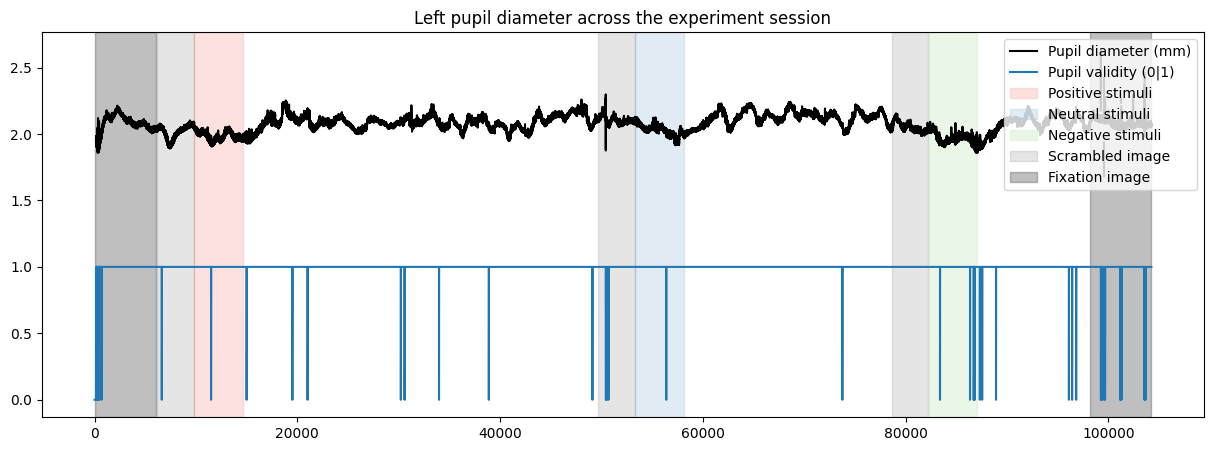

In [3]:
# Usage
overview_plot(data, pupil_to_plot='left')

# Preprocessing the pupil diameter signal

## Removal of invalid data (blinks)
Use the function `remove_invalids` from `utils.common` to drop all rows that do not contain pupil diameter data (likely due to blinks), and noisy data that surrounds a blink.

In [4]:
# Import the function and print docstring
from utils.common import remove_invalids
help(remove_invalids)

Help on function remove_invalids in module utils.common:

remove_invalids(dataframe, threshold=1, pad_before=150, pad_after=150, verbose=True)
    Removes continuous sequences of data where the pupil is invalid for atleast `threshold` number of samples;
    as well as the data before and after that sequence (size defined by `padding`).
    
    Args:
        - dataframe (pd.DataFrame):    The dataframe containing eye-tracking data.
        - threshold (int, optional):   Minimum number of continuous invalid rows to trigger removal. Defaults to 1 (aggressive removal).
        - pad_before (int, optional):  Number of rows to remove before each invalid segment. Defaults to 150 (aggressive artifact padding).
        - pad_after (int, optional):   Number of rows to remove after each invalid segment. Defaults to 150 (aggressive artifact padding).
        - verbose (bool, optional):    Print details on how much data has been removed. Defaults to True.
    
    Returns:
        - dataframe_clea

In [5]:
# Usage
data_invalids_removed = remove_invalids(data)

input dataframe size: 104255
ouput dataframe size: 87734
number of segments removed: 132
total number of rows removed: 16521


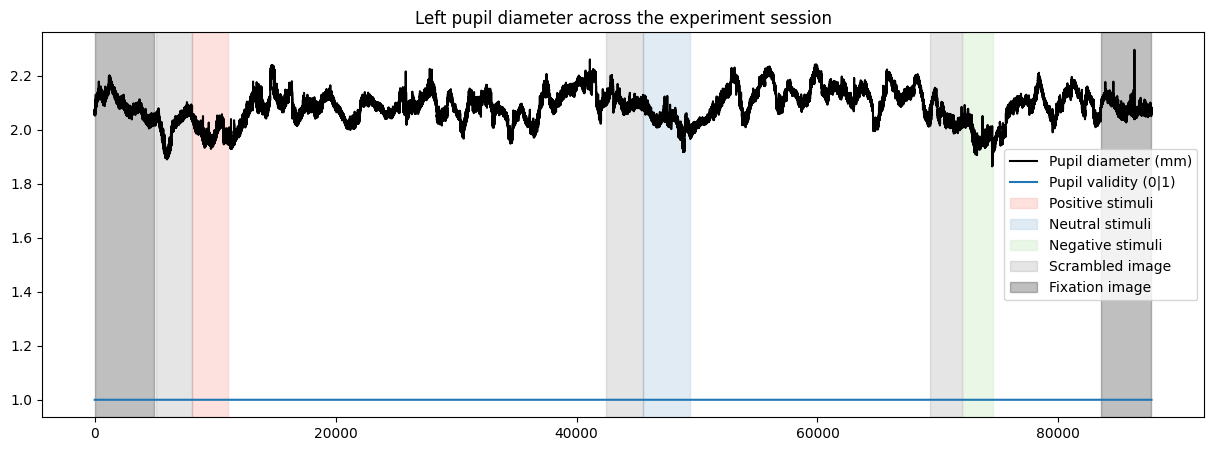

In [6]:
# Visualize to check
overview_plot(data_invalids_removed, pupil_to_plot='left')

## Replacing invalid data
Use the function `replace_invalids_w_nans` from `utils.common` to replace all rows that do not contain pupil diameter. Invalid data will be replaced with `np.nan`.

This function ensures that the length of the data stays the same, while ensuring the removal of noisy data.

*Note: While not used for pupil diameter, this function is a crucial component of saccade extraction.*

In [7]:
# Import the function and print docstring
from utils.common import replace_invalids_w_nans
help(replace_invalids_w_nans)

Help on function replace_invalids_w_nans in module utils.common:

replace_invalids_w_nans(dataframe, threshold=1, pad_before=150, pad_after=150, verbose=True)
    Replaces continuous sequences of data where the pupil is invalid for at least `threshold` samples
    with NaN values, including the data before and after that sequence (size defined by padding).
    
    Args:
        - dataframe (pd.DataFrame):    The dataframe containing eye-tracking data.
        - threshold (int, optional):   Minimum number of continuous invalid rows to trigger NaN replacement. Defaults to 1 (aggressive replacement).
        - pad_before (int, optional):  Number of rows to replace with NaN before each invalid segment. Defaults to 150 (aggressive artifact padding).
        - pad_after (int, optional):   Number of rows to replace with NaN after each invalid segment. Defaults to 150 (aggressive artifact padding).
        - verbose (bool, optional):    Print details on how much data has been repalced. Defaul

In [8]:
# Usage
data_invalids_replaced = replace_invalids_w_nans(data)

dataframe size: 104255
number of segments replaced with np.nan: 132
total number of rows replaced with np.nan: 16521


d:\GITHUB\eye-tracking-ccs\preprocessing and analysis\utils\common.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  dataframe.iloc[replace_positions_sorted] = np.nan


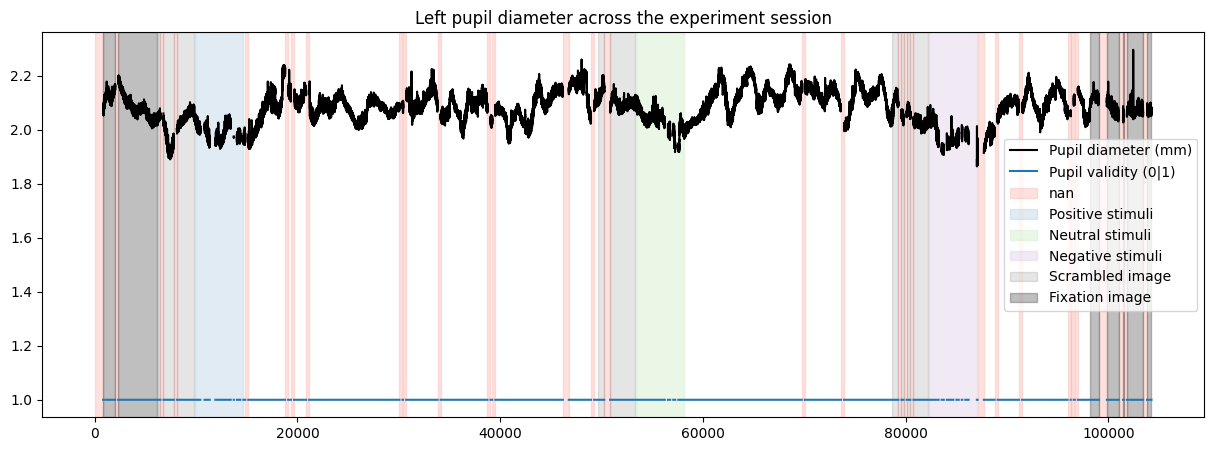

In [9]:
# Visualize to check
overview_plot(data_invalids_replaced, pupil_to_plot='left')

## Applying smoothing to the pupil diameter signal
Use the function `apply_smoothing` from `utils.pupildiameter` to smooth the pupil diameter signal.

In [10]:
# Import the function and print docstring
from utils.pupildiameter import apply_smoothing
help(apply_smoothing)

Help on function apply_smoothing in module utils.pupildiameter:

apply_smoothing(dataframe, window_length=101, polyorder=3, plot_fig=False)
    Applies smoothing to the pupil diameter to decrease random fluctuations.
    
    Args:
        - dataframe (pd.DataFrame): The dataframe containing eye-tracking data,
                             ideally after invalid rows have been removed by the `remove_invalids` function.
        - window_length (int, optional): The size of moving window over which the polynomial is fitted. Argument is passed to Savitzky-Golay filter. Defaults to 101.
        - polyorder (int, optional):     The degree of polynomial used to approximate the data inside each window. Argument is passed to Savitzky-Golay filter. Defaults to 3.
        - plot_fig (bool, optional):     If True, plot figure which overlays the raw and smoothed signals. Defaults to False.
    
    Returns:
        - dataframe (pd.DataFrame): Dataframe after applying smoothing to pupil diameter.
    

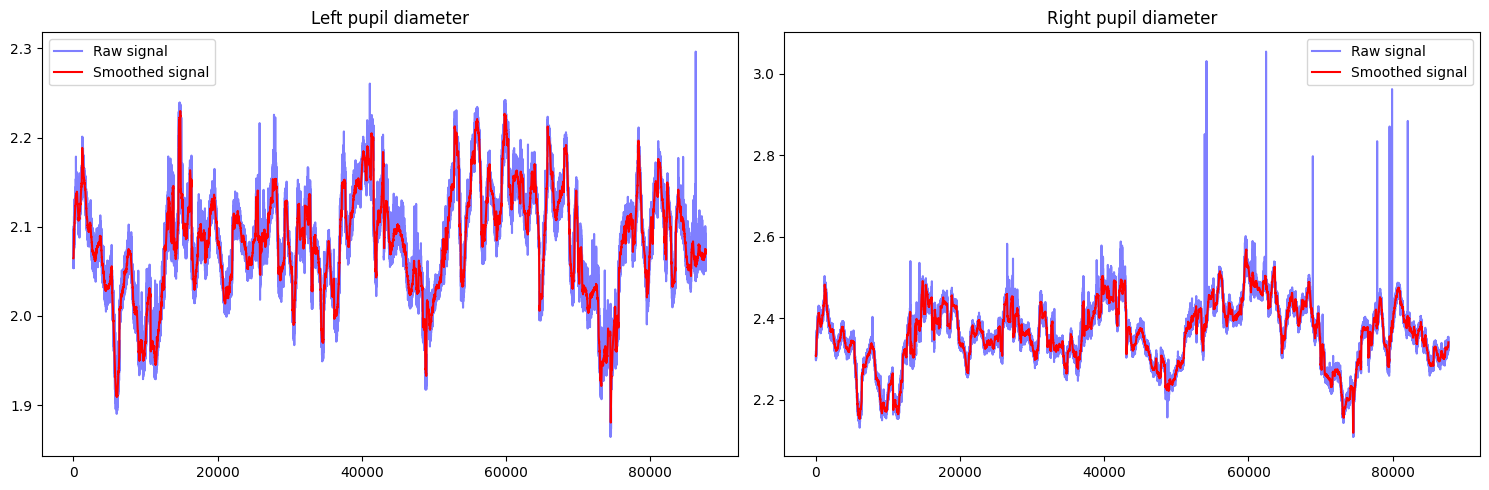

In [11]:
# Usage
# Note: Use the dataframe from which invalid and noisy data has been removed
data_invalids_removed_smoothed = apply_smoothing(data_invalids_removed, plot_fig=True)

# Performing baseline correction of pupil diameter
Use the function `baseline_correction` from `utils.pupildiameter` to perform **subtractive baseline correction** of the pupil diameter signal.

The signal is corrected by subtracting the baseline (scrambled image) value from its corresponding stimulus period. <br>
The baseline value is calculated by taking the mean of a 500 ms period, towards the end of the scrambled image viewing period.

Each pupil is baseline corrected individually.

The dataframe returned by this function has two new columns, containing baseline-corrected pupil diameter values: <br>
`left_pupil_diameter_bc` and `left_pupil_diameter_bc`.

In [12]:
# Import the function and print docstring
from utils.pupildiameter import baseline_correction
help(baseline_correction)

Help on function baseline_correction in module utils.pupildiameter:

baseline_correction(dataframe)
    Performs subtractive baseline correction (per pupil, per trial) by taking the mean from a 500 ms baseline period (scrambled image).
    
    Args:
        - dataframe (pd.DataFrame): The dataframe containing eye-tracking data,
                             ideally after removing invalid rows using `remove_invalids`,
                             and smoothing the pupil diameter signal using `apply_smoothing`.
    
    Returns:
        - dataframe (pd.DataFrame): Dataframe after performing baseline correction.
                                    This dataframe will contain two new columns: "left_pupil_diameter_bc" and "right_pupil_diameter_bc".



In [13]:
# Usage
# Note: Use the dataframe where invalids have been removed, and smoothing applied
data_baseline_corrected = baseline_correction(data_invalids_removed_smoothed)

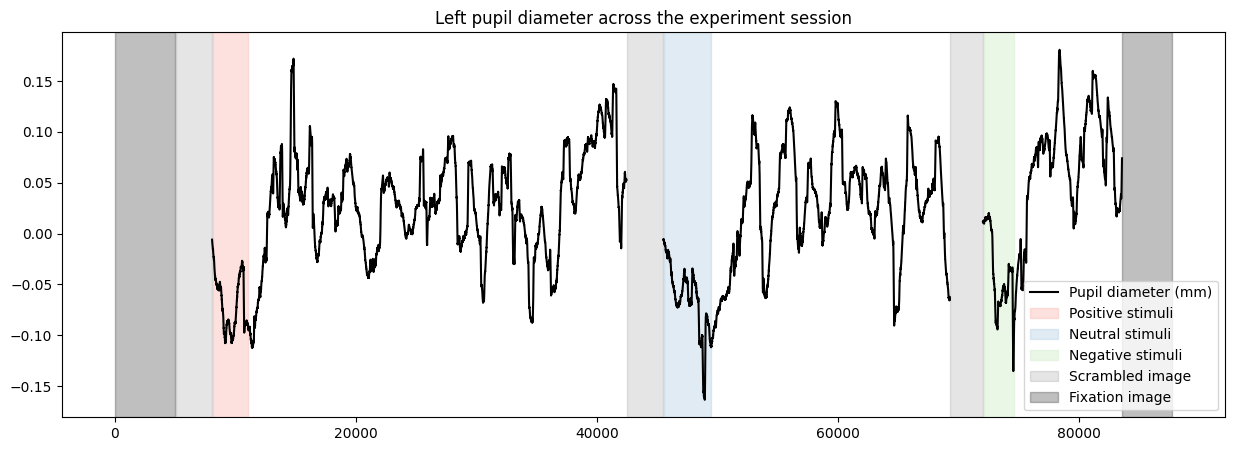

In [14]:
# Visualize to check
overview_plot(data_baseline_corrected, baseline_corrected=True, pupil_to_plot='left', plot_validity=False)

# Analysis